In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

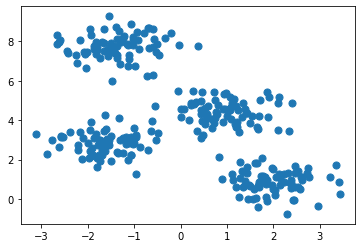

In [5]:
#Getting the data from skelarn blob 

from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s=50)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [7]:
y_kmeans

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

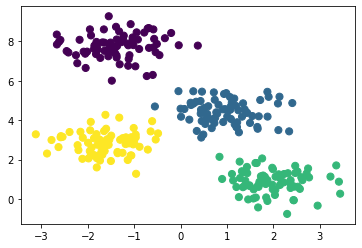

In [11]:
plt.scatter(X[:,0], X[:,1], c= y_kmeans,s = 50)

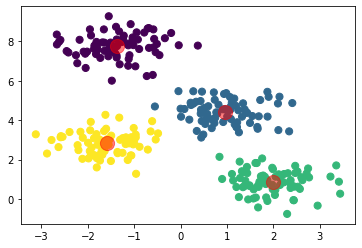

In [15]:
# Kmeans from scratch

from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X,n_clusters, rseed = 2):

    #randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]


    while True:

        #2a. Assign labels based on the closest center
        labels = pairwise_distances_argmin(X,centers)

        #2b. Find new clusters from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        #2c. Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X,4)


plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap= 'viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s = 200, alpha = 0.5)